In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set()#for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')
#import the dataset
data=pd.read_csv('Datasets/movie_metadata1.csv')
# print(data.shape)
# print(data.head)
print(data.head(5))

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                     723       178   
1  Color     Gore Verbinski                     302       169   
2  Color         Sam Mendes                     602       148   
3  Color  Christopher Nolan                     813       164   
4     49        Doug Walker                      49        49   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                        0                     855  Joel David Moore   
1                      563                    1000     Orlando Bloom   
2                        0                     161      Rory Kinnear   
3                    22000                   23000    Christian Bale   
4                      131                      49        Rob Walker   

   actor_1_facebook_likes      gross                           genres  ...  \
0                    1000  760505847  Action|Adventure|Fantasy|Sci-Fi  ...   
1                   

In [3]:
data['director_facebook_likes']

0           0
1         563
2           0
3       22000
4         131
        ...  
5038        2
5039       49
5040        0
5041        0
5042       16
Name: director_facebook_likes, Length: 5043, dtype: int64

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
newdata=data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [6]:
from sklearn.cluster import KMeans

In [7]:
k=KMeans(n_clusters=5)
k.fit(newdata)

C:\Users\azart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [10]:
k.cluster_centers_

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [15]:
print(k.labels_)

[0 0 0 ... 0 0 0]


In [17]:
print(len(k.labels_))

5043


In [18]:
print(type(k.labels_))

<class 'numpy.ndarray'>


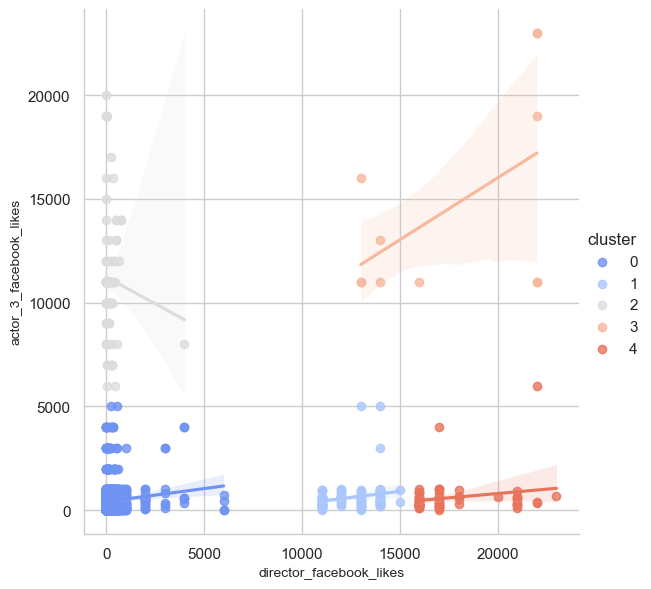

In [24]:
newdata['cluster'] = k.labels_

# Set seaborn style
sns.set_style('whitegrid')

# Create lmplot
sns.lmplot(x='director_facebook_likes', y='actor_3_facebook_likes', data=newdata, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=True)